In [1]:
import numpy as np
import matplotlib.pylab as plt 

### Write a program that calculates$$ e^{-x} = \sum_{n=0}^N (-1)^n \frac{x^n}{n!} $$

In [2]:
def expnorm(x, N):
    '''
    serie para e^x 
    '''
    suma = 0.
    for n in range(N):
        suma += (x**n)/(np.math.factorial(n))
    return suma

def expinv(x, N):
    '''
    serie para e^(-x) 
    '''
    suma = 0.
    for n in range(N):
        suma += ((-1)**n)*((x**n)/(np.math.factorial(n)))
    return suma

### Calculate your series for $x \le 1 $and compare it to the built-in function exp(x) (you may assume that the built-in exponential function is exact). You should pick an N for which the next term in the series is no more than $10^{-7}$ of the sum up to that point $$\Bigg{|}\frac{(-x)^{(N+1)}}{(N+1)!}\Bigg{|} \le \Bigg{|}10^7 \sum_{N=1}^N \frac{(-x)^n}{n!}\Bigg{|}$$

In [3]:
def N_opt(x):
    '''
    Número óprimo de repeticiones
    '''
    i = 0
    err = False
    while err == False:
        err = (abs(expinv(x,i+1)*1e-7) >= abs((-x)**(i+2)/np.math.factorial(i+2)))        
        if (err): break
        i += 1    
    return i    

In [4]:
N_opt(1)

9

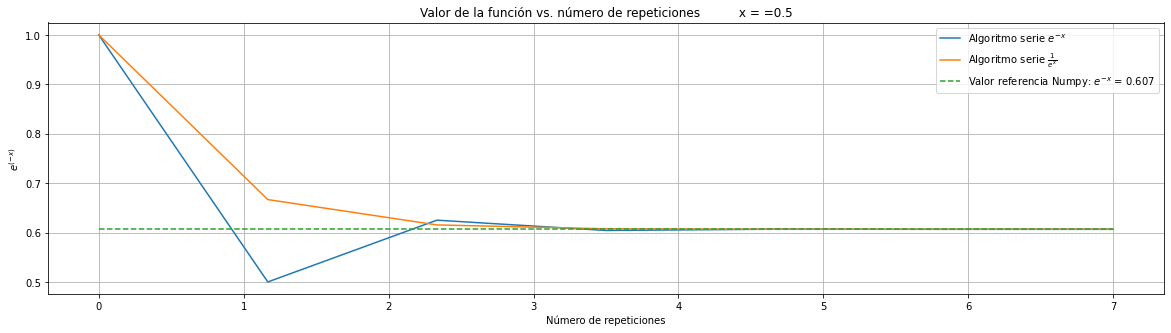

In [5]:
x = 0.5
N = N_opt(x)


NN = np.linspace(0,N,N)
Y1 = np.zeros(N)
Y2 = np.zeros(N)

for i in range(N):
    Y1[i] = expinv(x,i+1)
    Y2[i] = 1/expnorm(x,i+1)

plt.figure(figsize = (20,5))
ax = plt.subplot()
ax.plot(NN,Y1, label = r'Algoritmo serie $e^{-x}$')
ax.plot(NN,Y2, label = r'Algoritmo serie $\frac{1}{e^x}$')
ax.plot([0,N],[np.e**(-x), np.e**(-x)], '--' , label = f'Valor referencia Numpy: $e^{{-x}}$ = {np.e**(-x):.3f}')
ax.legend()
ax.set_title('Valor de la función vs. número de repeticiones' + ' '*10 + 'x = =0.5')
ax.set_ylabel(r"$e^{({-x})}$")
ax.set_xlabel('Número de repeticiones')
ax.grid()

### Examine the terms in the series for $x \approx 10$ and observe the significant subtractive cancellations that occur when large terms add together to give small answers. In particular, print out the near-perfect cancellation at $n \approx x-1$

Text(0.5, 0.98, 'Valor de la función vs. número de repeticiones          x =10')

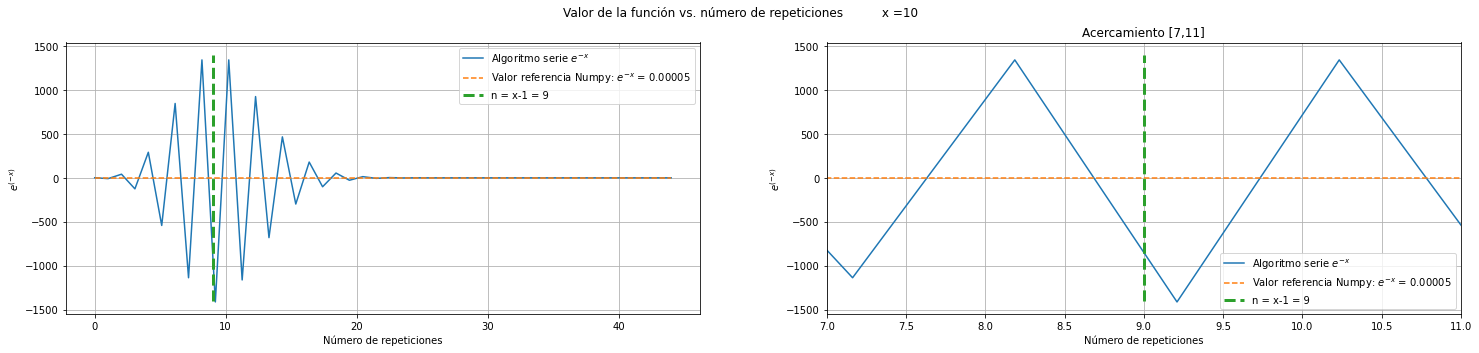

In [6]:
x = 10
N = N_opt(x)


NN = np.linspace(0,N,N)
Y1 = np.zeros(N)
Y2 = np.zeros(N)

for i in range(N):
    Y1[i] = expinv(x,i+1)
    Y2[i] = 1/expnorm(x,i+1)
    
# plt.figure(figsize = (30,5))
fig, ax = plt.subplots(1,2, figsize = (25,5))
ax[0].plot(NN,Y1, label = r'Algoritmo serie $e^{-x}$')
# ax.plot(NN,Y2, label = r'Algoritmo serie $\frac{1}{e^x}$')
ax[0].plot([0,N],[np.e**(-x), np.e**(-x)], '--' , label = f'Valor referencia Numpy: $e^{{-x}}$ = {np.e**(-x):.5f}')
ax[0].plot([x-1,x-1], [-1400,1400], '--' , linewidth = 3 , label = f'n = x-1 = {x-1} ')
ax[0].legend()
# ax[0].set_title('Valor de la función vs. número de repeticiones' + ' '*10 + f'x ={x}')
ax[0].set_ylabel(r"$e^{({-x})}$")
ax[0].set_xlabel('Número de repeticiones')
ax[0].grid()
# ax[0].set_ylim(np.e**(-x)-1e-9,np.e**(-x)+1e-9)
# ax[0].set_xlim(40,44.1)


ax[1].plot(NN,Y1, label = r'Algoritmo serie $e^{-x}$')
# ax.plot(NN,Y2, label = r'Algoritmo serie $\frac{1}{e^x}$')
ax[1].plot([0,N],[np.e**(-x), np.e**(-x)], '--' , label = f'Valor referencia Numpy: $e^{{-x}}$ = {np.e**(-x):.5f}')
ax[1].plot([x-1,x-1], [-1400,1400], '--' , linewidth = 3 , label = f'n = x-1 = {x-1} ')
ax[1].legend()
ax[1].set_title(r'Acercamiento [7,11]')
ax[1].set_ylabel(r"$e^{({-x})}$")
ax[1].set_xlabel('Número de repeticiones')
ax[1].grid()
ax[1].set_xlim(7,11)
fig.suptitle('Valor de la función vs. número de repeticiones' + ' '*10 + f'x ={x}')

#### See if better precision is obtained by being clever and using exp(−x) = 1/ exp(x) for large x values. This eliminates subtractive cancellation, but does not eliminate all roundoff errors


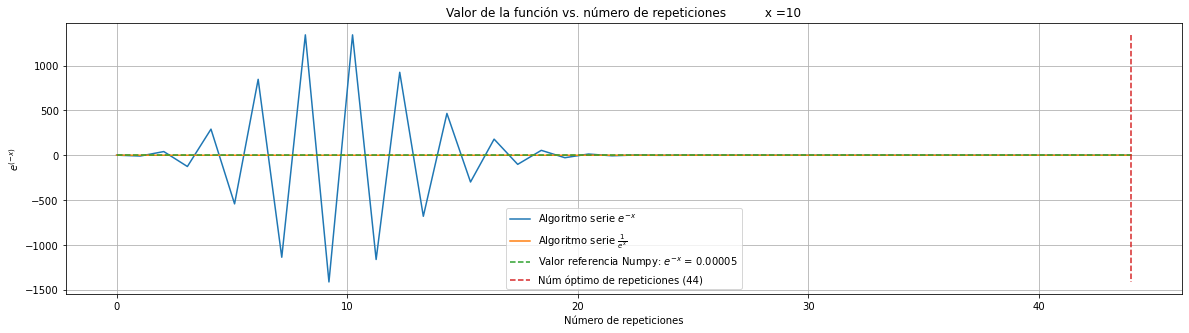

In [79]:
x = 10
N = N_opt(x)

NN = np.linspace(0,N,N)
Y1 = np.zeros(N)
Y2 = np.zeros(N)

for i in range(N):
    Y1[i] = expinv(x,i+1)
    Y2[i] = 1/expnorm(x,i+1)
    
plt.figure(figsize = (20,5))
ax = plt.subplot()
ax.plot(NN,Y1, label = r'Algoritmo serie $e^{-x}$')
ax.plot(NN,Y2, label = r'Algoritmo serie $\frac{1}{e^x}$')
ax.plot([0,N],[np.e**(-x), np.e**(-x)], '--' , label = f'Valor referencia Numpy: $e^{{-x}}$ = {np.e**(-x):.5f}')
ax.plot([N,N],[np.max(Y1),np.min(Y1)], '--' , label = f'Núm óptimo de repeticiones ({N})')
ax.set_title('Valor de la función vs. número de repeticiones' + ' '*10 + f'x ={x}')
ax.set_ylabel(r"$e^{({-x})}$")
ax.set_xlabel('Número de repeticiones')
ax.legend()
ax.grid()

### By progressively increasing x from 1 to 10, and then from 10 to 100, use your program to determine experimentally when the series starts to lose accuracy, and when the series no longer converges


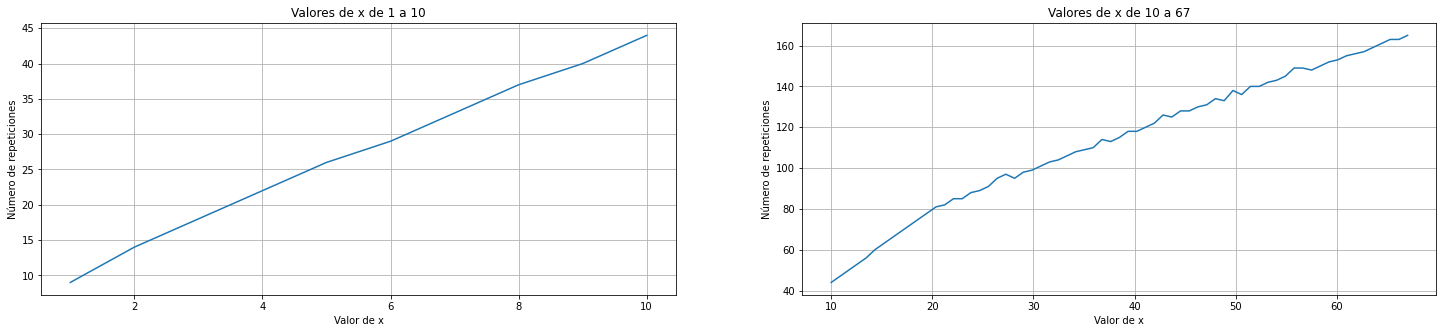

In [13]:
x1 = np.linspace(1,10,10)
N1 = np.zeros(len(x1))
for i, xx in enumerate(x1):
    N1[i] = N_opt(xx)

x2 = np.linspace(10,67,67)
N2 = np.zeros(len(x2))
for i, xx in enumerate(x2):
    N2[i] = N_opt(xx)

fig, ax = plt.subplots(1,2, figsize=(25,5))    
ax[0].plot(x1,N1)
ax[0].set_title('Valores de x de 1 a 10')
ax[0].set_xlabel('Valor de x')
ax[0].set_ylabel('Número de repeticiones')
ax[0].grid()

ax[1].plot(x2,N2)
ax[1].set_title('Valores de x de 10 a 67')
ax[1].set_xlabel('Valor de x')
ax[1].set_ylabel('Número de repeticiones')
ax[1].grid()

### Make a series of graphs of the error versus N for different values of x.


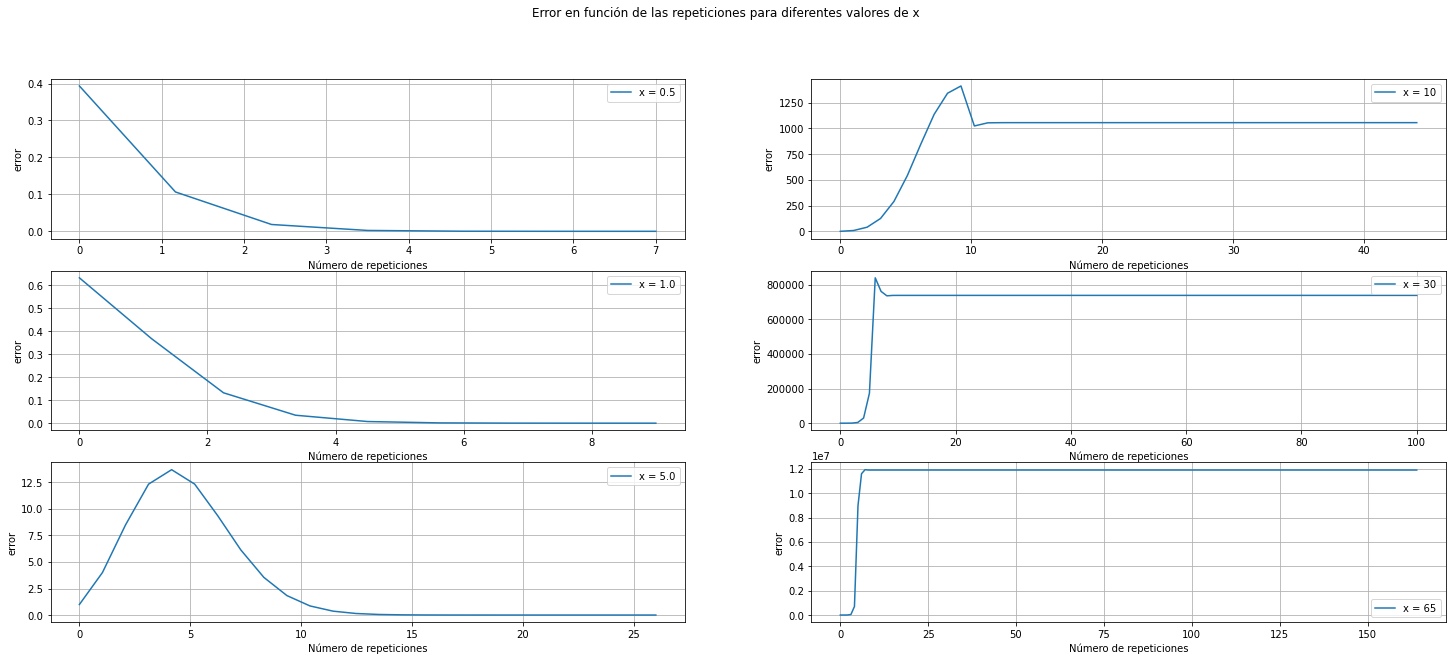

In [85]:
x0 = np.array([.5, 1, 5])
x1 = np.array([10, 30, 65])

fig, ax = plt.subplots(len(x0),2,figsize = (25,10))
fig.suptitle('Error en función de las repeticiones para diferentes valores de x')

j = 0
for k, xx in enumerate(x0):
    N = N_opt(float(xx))

    NN = np.linspace(0,N,N)
    Y1 = np.zeros(N)

    for i in range(N):
        Y1[i] = abs(np.e**(-xx) - expinv(xx,i+1))

    ax[k][j].plot(NN,Y1, label = f'x = {xx}')
    # ax[k][j].set_title('Valor de la función vs. número de repeticiones' + ' '*10 + f'x ={xx}')
    ax[k][j].set_ylabel("error")
    ax[k][j].set_xlabel('Número de repeticiones')
    ax[k][j].legend()
    ax[k][j].grid()

j = 1
for k, xx in enumerate(x1):
    N = N_opt(float(xx))

    NN = np.linspace(0,N,N)
    Y1 = np.zeros(N)

    for i in range(N):
        Y1[i] = abs(np.e**(-xx) - expinv(xx,i+1))

    ax[k][j].plot(NN,Y1, label = f'x = {xx}')
    # ax[k][j].set_title('Valor de la función vs. número de repeticiones' + ' '*10 + f'x ={xx}')
    ax[k][j].set_ylabel("error")
    ax[k][j].set_xlabel('Número de repeticiones')
    ax[k][j].legend()
    ax[k][j].grid()    